# Start with importing the Natural Language ToolKit Library of Python

In [1]:
import nltk

#### Now Download the Movie Reviews files from the NLTK database 

In [2]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to C:\Users\An
[nltk_data]     Unstoppable\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

#### Inspecting the Movie Review and Import the Database using NLTK corpus

In [3]:
from nltk.corpus import movie_reviews

#### Fileids method provided in all the datasets in nltk corpus, which gives access to a list of all the files available

In [5]:
movie_reviews.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


#### Checking Last five files of the Movie Reviews

In [13]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

#### Checking first five files of the Movie Reviews

In [14]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

#### make separate list of positive and negative movies 

In [15]:
neg_fileids = movie_reviews.fileids('neg')
pos_fileids = movie_reviews.fileids('pos')

#### Checking The length of the Two List

In [18]:
len(neg_fileids), len(pos_fileids)

(1000, 1000)

#### Checking Out One of the Reviews from the positive reviews

In [25]:
print(movie_reviews.raw(fileids=pos_fileids[0]))

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

# Tokenize Text in the Words

### Checking the List of words from the positive fields of Movie Reviews

#### All corpora in nltk already provides a way to generate tokenized Words

In [26]:
movie_reviews.words(fileids=pos_fileids[0])

['films', 'adapted', 'from', 'comic', 'books', 'have', ...]

### Punkt Sentence Tokenizer - The NLTK data package includes a pre-trained Punkt tokenizer for English.

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\An
[nltk_data]     Unstoppable\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Download Stopwords from nltk 
#### which uses for removing the stopwords from the sentences

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\An
[nltk_data]     Unstoppable\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
import string

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Make a list of Useless words by collecting all the stopwords and punctuation marks

In [32]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)

In [75]:
#useless_words

# Build A bag of word model 

### contains Unordered collections of the words. 

#### From this Bag of the Words we build features used by classifier, Here we use each word as feature which is either True or False.
#### This is implemented as Dictionary

In [34]:
def bag_word_feature_filtered(words):
    return {
        word:1 for word in words \
        if not word in useless_words
    }

## Plotting Frequencies of words

#### In this we find the most common words and plot their frequency.

In [36]:
all_words = movie_reviews.words()
len(all_words)

1583820

In [38]:
len(all_words)/1e6

1.58382

### Filtering out useless words from the all words

In [39]:
filtered_words = [word for word in movie_reviews.words() if not word in useless_words]

In [40]:
type(filtered_words)

list

In [41]:
len(filtered_words)/1e6

0.710579

## Collections package of the standard library contains Counter class

### This Counter class helps to find the frequency of the words in our list

In [43]:
from collections import Counter

In [44]:
word_counter = Counter(filtered_words)

In [76]:
#word_counter

#### most_common() method helps to find out words with higher count.

In [49]:
most_common_words = word_counter.most_common()[:10]

In [50]:
most_common_words

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049)]

#### Importing the Matplotlib for plotting the graph

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Sorting the words according to their frequency from higher to lower

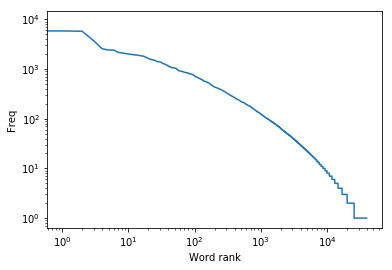

In [55]:
sorted_word_counts = sorted(list(word_counter.values()), reverse = True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word rank");

#### Displays how many words have a count in specific range

(array([3.897e+04, 3.610e+02, 1.170e+02, 4.300e+01, 4.000e+01, 1.500e+01,
        9.000e+00, 8.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.91320e+02, 3.81640e+02, 5.71960e+02, 7.62280e+02,
        9.52600e+02, 1.14292e+03, 1.33324e+03, 1.52356e+03, 1.71388e+03,
        1.90420e+03, 2.09452e+03, 2.28484e+03, 2.47516e+03, 2.66548e+03,
        2.85580e+03, 3.04612e+03, 3.23644e+03, 3.42676e+03, 3.61708e+03,
        3.80740e+03, 3.99772e+03, 4.18804e+03, 4.37836e+03, 4.56868e+03,
        4.7

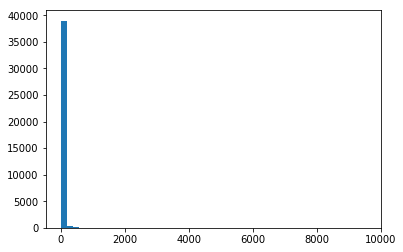

In [57]:
plt.hist(sorted_word_counts, bins=50)

(array([3.897e+04, 3.610e+02, 1.170e+02, 4.300e+01, 4.000e+01, 1.500e+01,
        9.000e+00, 8.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.91320e+02, 3.81640e+02, 5.71960e+02, 7.62280e+02,
        9.52600e+02, 1.14292e+03, 1.33324e+03, 1.52356e+03, 1.71388e+03,
        1.90420e+03, 2.09452e+03, 2.28484e+03, 2.47516e+03, 2.66548e+03,
        2.85580e+03, 3.04612e+03, 3.23644e+03, 3.42676e+03, 3.61708e+03,
        3.80740e+03, 3.99772e+03, 4.18804e+03, 4.37836e+03, 4.56868e+03,
        4.7

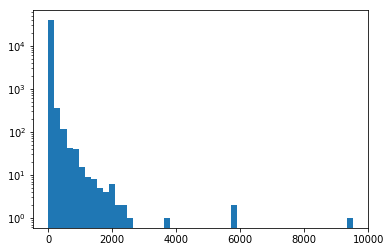

In [58]:
plt.hist(sorted_word_counts, bins=50, log= True)

## Train A Classifier for Sentimental Analysis

In [60]:
neg_features = [
    (bag_word_feature_filtered(movie_reviews.words(fileids=[f])), 'neg') \
    for f in neg_fileids
]

In [61]:
print(neg_features[3])

({'quest': 1, 'camelot': 1, 'warner': 1, 'bros': 1, 'first': 1, 'feature': 1, 'length': 1, 'fully': 1, 'animated': 1, 'attempt': 1, 'steal': 1, 'clout': 1, 'disney': 1, 'cartoon': 1, 'empire': 1, 'mouse': 1, 'reason': 1, 'worried': 1, 'recent': 1, 'challenger': 1, 'throne': 1, 'last': 1, 'fall': 1, 'promising': 1, 'flawed': 1, '20th': 1, 'century': 1, 'fox': 1, 'production': 1, 'anastasia': 1, 'hercules': 1, 'lively': 1, 'cast': 1, 'colorful': 1, 'palate': 1, 'beat': 1, 'hands': 1, 'came': 1, 'time': 1, 'crown': 1, '1997': 1, 'best': 1, 'piece': 1, 'animation': 1, 'year': 1, 'contest': 1, 'pretty': 1, 'much': 1, 'dead': 1, 'arrival': 1, 'even': 1, 'magic': 1, 'kingdom': 1, 'mediocre': 1, '--': 1, 'pocahontas': 1, 'keeping': 1, 'score': 1, 'nearly': 1, 'dull': 1, 'story': 1, 'revolves': 1, 'around': 1, 'adventures': 1, 'free': 1, 'spirited': 1, 'kayley': 1, 'voiced': 1, 'jessalyn': 1, 'gilsig': 1, 'early': 1, 'teen': 1, 'daughter': 1, 'belated': 1, 'knight': 1, 'king': 1, 'arthur': 1, '

In [64]:
pos_features = [
    (bag_word_feature_filtered(movie_reviews.words(fileids=[f])), 'pos') \
    for f in pos_fileids
]

In [66]:
print(pos_features[6])

({'apparently': 1, 'director': 1, 'tony': 1, 'kaye': 1, 'major': 1, 'battle': 1, 'new': 1, 'line': 1, 'regarding': 1, 'film': 1, 'american': 1, 'history': 1, 'x': 1, 'know': 1, 'details': 1, 'fight': 1, 'seems': 1, 'happy': 1, 'final': 1, 'product': 1, 'nearly': 1, 'removed': 1, 'name': 1, 'credits': 1, 'altogether': 1, 'heard': 1, 'kind': 1, 'thing': 1, 'happening': 1, 'makes': 1, 'wonder': 1, 'much': 1, 'input': 1, 'studio': 1, 'films': 1, 'produce': 1, 'found': 1, 'extremely': 1, 'good': 1, 'focused': 1, 'look': 1, 'touchy': 1, 'subject': 1, 'racism': 1, 'powerful': 1, 'charismatic': 1, 'performance': 1, 'edward': 1, 'norton': 1, 'hard': 1, 'believe': 1, 'two': 1, 'years': 1, 'since': 1, 'fantastic': 1, 'role': 1, 'primal': 1, 'fear': 1, 'starring': 1, 'making': 1, 'star': 1, 'one': 1, 'performers': 1, 'becomes': 1, 'character': 1, 'work': 1, 'best': 1, 'performances': 1, 'year': 1, 'plays': 1, 'young': 1, 'man': 1, 'named': 1, 'derek': 1, 'vinyard': 1, 'skinhead': 1, 'living': 1, '

## Import Supervised machine learning classifier named Naive Bayes Classifier from NLTK classifier

In [67]:
from nltk.classify import NaiveBayesClassifier

In [68]:
split = 800

### Train Classifier on the 80% of the data

In [69]:
sentiment_classifier = NaiveBayesClassifier.train(pos_features[:split]+neg_features[:split])

### Checking the classifier's accuracy after tarin it using the trained data itself 

In [70]:
nltk.classify.util.accuracy(sentiment_classifier,pos_features[:split]+neg_features[:split])

0.980625

### Checking the classifier's accuracy on the remaining 20% data

In [71]:
nltk.classify.util.accuracy(sentiment_classifier,pos_features[split:]+neg_features[split:])

0.7175

## Filter out most informative features

### The words that mostly identify a positive or negative review

In [72]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
             outstanding = 1                 pos : neg    =     13.9 : 1.0
               insulting = 1                 neg : pos    =     13.7 : 1.0
              vulnerable = 1                 pos : neg    =     13.0 : 1.0
               ludicrous = 1                 neg : pos    =     12.6 : 1.0
             uninvolving = 1                 neg : pos    =     12.3 : 1.0
                  avoids = 1                 pos : neg    =     11.7 : 1.0
              astounding = 1                 pos : neg    =     11.7 : 1.0
             fascination = 1                 pos : neg    =     11.0 : 1.0
                  seagal = 1                 neg : pos    =     10.3 : 1.0
                  darker = 1                 pos : neg    =     10.3 : 1.0
